<a href="https://colab.research.google.com/github/Arunachalam-J/machine_learning/blob/main/milk_production_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("/content/drive/MyDrive/monthly-milk-production-pounds.csv", index_col=0, parse_dates=True)
data.head()

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


<Axes: xlabel='Month'>

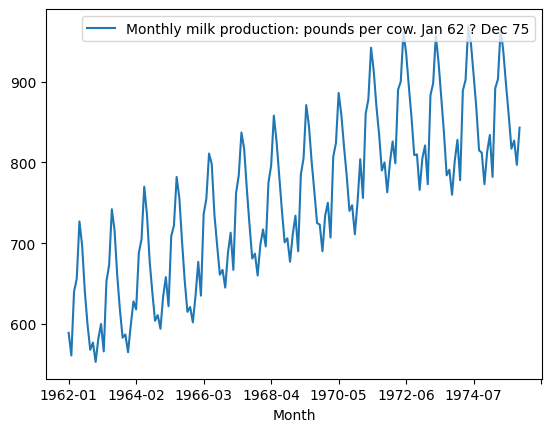

In [21]:
data.plot()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
data.columns

Index(['Monthly milk production: pounds per cow. Jan 62 ? Dec 75'], dtype='object')

In [24]:
data = data.rename(columns={"Monthly milk production: pounds per cow. Jan 62 ? Dec 75":"Production"})
data.head()

,Production
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


In [25]:
data.isna().sum()

Production    1
dtype: int64

In [26]:
data = data.dropna()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1962-01 to 1975-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6+ KB


In [30]:
data.index.freq ="MS"

In [55]:
result = seasonal_decompose(data["Production"])
result.plot()

ValueError: ignored

In [32]:
data.size

168

In [33]:
train =data.iloc[:156]
test = data.iloc[156:]


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [36]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [37]:
timed_data = TimeseriesGenerator(scaled_train, scaled_train, length=12,batch_size=1)

In [38]:
timed_data

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [42]:
model = Sequential()
model.add(LSTM(100,activation="relu",input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(timed_data, epochs=50)

Epoch 1/50
144/144 [==============================] - 3s 8ms/step - loss: 0.0378
Epoch 2/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0236
Epoch 3/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0206
Epoch 4/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0109
Epoch 5/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0068
Epoch 6/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0061
Epoch 7/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0038
Epoch 8/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0041
Epoch 9/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 10/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 11/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0040
Epoch 12/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0036
Epoch 13/50
144/144 [==

In [46]:
model.history.history["loss"]

[0.03784780204296112,
 0.023618392646312714,
 0.02056778408586979,
 0.010902661830186844,
 0.006795231718569994,
 0.006141764111816883,
 0.003822558093816042,
 0.004089294001460075,
 0.003299619071185589,
 0.0033246073871850967,
 0.004007140174508095,
 0.0035950830206274986,
 0.00524680782109499,
 0.003182636806741357,
 0.0035174889490008354,
 0.003178561804816127,
 0.003929932601749897,
 0.0030255501624196768,
 0.003805306972935796,
 0.003939591348171234,
 0.002772827632725239,
 0.0029487949796020985,
 0.0025200853124260902,
 0.0033211589325219393,
 0.003361174138262868,
 0.002975939307361841,
 0.002760455710813403,
 0.002987293526530266,
 0.0022906765807420015,
 0.0030143193434923887,
 0.0028351217042654753,
 0.00381893920712173,
 0.0024589309468865395,
 0.002794272266328335,
 0.0031033114064484835,
 0.0022413916885852814,
 0.0031431277748197317,
 0.0023677549324929714,
 0.00214586453512311,
 0.0021273279562592506,
 0.0026935292407870293,
 0.0022501666098833084,
 0.002518338151276111

In [51]:
test_prediction = []

test_timed = scaled_train[-12:]
current_batch = test_timed.reshape((1,12,1))

In [52]:
for i in range(len(scaled_test)):
  current_pred = model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 42ms/step


In [53]:
test["prediction"] = scaler.inverse_transform(test_prediction)

<ipython-input-53-65323f4a2759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"] = scaler.inverse_transform(test_prediction)


<Axes: xlabel='Month'>

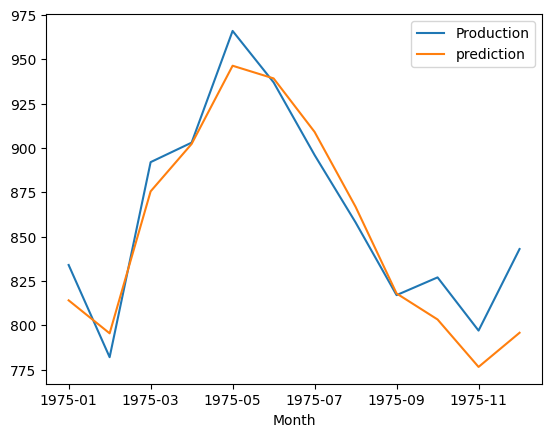

In [54]:
test.plot()